In [39]:
import numpy as np
import gsd.hoomd
import hoomd
from hoomd import hpmc
import matplotlib.pyplot as plt

In [28]:
hoomd.context.initialize("--mode=cpu")

In [56]:
cube_verts = np.array([(0,0,0),(1,0,0),(1,1,0),(1,1,1),(0,1,1),(1,0,1),(0,1,0),(0,0,1)]) 
cube1 = cube_verts
cube2 = []
for vert in cube_verts:
    cube2vert = (vert[0] + 2, vert[1], vert[2])
    cube2.append(cube2vert)
cube2 = np.array(cube2)
box_matrix = np.array([[3,0,0], [0,1,0], [0,0,1]])
box_matrix  = np.transpose(box_matrix)

In [3]:
# centered on origin
cube_verts = np.array([(0,0,0),(1,0,0),(1,1,0),(1,1,1),(0,1,1),(1,0,1),(0,1,0),(0,0,1)]) - 0.5 
cube1 = []
cube2 = []
for vert in cube_verts:
    cube1vert = (vert[0]-1, vert[1], vert[2])
    cube1.append(cube1vert)
    cube2vert = (vert[0]+1
                 , vert[1], vert[2])
    cube2.append(cube2vert)
cube1 = np.array(cube1)
cube2 = np.array(cube2)
# box_matrix = np.array([[3,0,0], [0,1,0], [0,0,1]])
# box_matrix  = np.transpose(box_matrix)

In [6]:
cube2

array([[ 0.5, -0.5, -0.5],
       [ 1.5, -0.5, -0.5],
       [ 1.5,  0.5, -0.5],
       [ 1.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5],
       [ 1.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5],
       [ 0.5, -0.5,  0.5]])

In [31]:
# gsd snapshot
snap = gsd.hoomd.Snapshot()
snap.particles.position = np.array([[1,0,0], [-1,0,0]])
snap.configuration.box = [3,1,1,0,0,0]

In [30]:
# hoomd snapshot
box = hoomd.data.boxdim(3,1,1,0,0,0)
snap = hoomd.data.make_snapshot(N = 2, box = box)
snap.particles.position[0] = [-1,0,0]
snap.particles.position[1] = [1,0,0]

In [31]:
system = hoomd.init.read_snapshot(snap)

notice(2): Group "all" created containing 2 particles


In [32]:
polyhedra_type = "A"
depletant_type = "B"
system.particles.types.add(depletant_type)
seed = np.random.randint(1,1e5)
mc = hpmc.integrate.convex_spheropolyhedron(seed=seed, implicit=True)
mc.shape_param.set("A", vertices = cube_verts, sweep_radius = 0)
mc.set_params(depletant_type = depletant_type)
mc.set_params(d = {polyhedra_type: 0, depletant_type: 0}, a = {polyhedra_type: 0, depletant_type: 0})
mc.set_params(nR=0)
free_vol = hpmc.compute.free_volume(mc = mc, seed = seed, nsample = 5e5, test_type = depletant_type)
log_quantities = ['hpmc_free_volume']
log = hoomd.analyze.log(filename=None, quantities = log_quantities, period = 1, overwrite = True)
depletant_radii = np.linspace(0.05, 0.5, 10)
# print (depletant_radii)
# mc.shape_param.set(depletant_type, vertices=[], sweep_radius=depletant_radius)
# hoomd.run(1)

-----
You are using implicit depletants. Please cite the following:
* J Glaser, A S Karas, and S C Glotzer. "A parallel algorithm for implicit
  depletant simulations", The Journal of Chemical Physics 143 (2015) 184110
-----
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


In [37]:
depletant_radii = np.linspace(0.05, 0.8, 30)
free_vols = []
for depletant_radius in depletant_radii:
    mc.shape_param.set(depletant_type, vertices=[], sweep_radius=depletant_radius)
    hoomd.run(1, quiet=True)
    free_vols.append(log.query('hpmc_free_volume'))

Text(0.5, 1.0, 'free volume sanity')

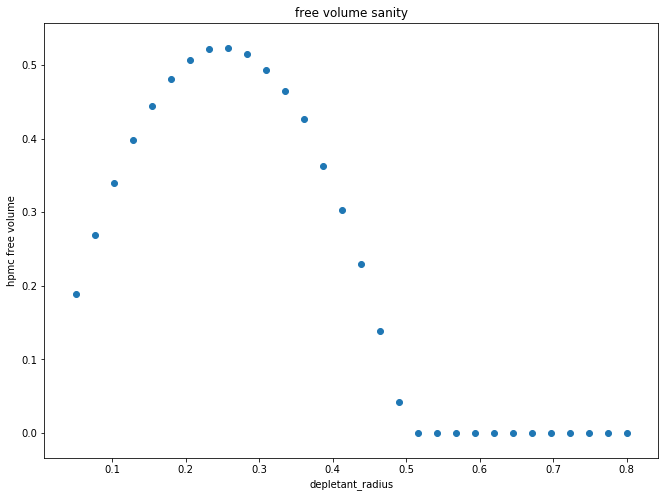

In [50]:
plt.figure(figsize=(11,8))
plt.scatter(depletant_radii, np.asarray(free_vols)*(4/3*np.pi*depletant_radii))
plt.ylabel('hpmc free volume')
plt.xlabel('depletant_radius')
plt.title('free volume sanity')

In [44]:
import freud

In [45]:
freud.box.Box.from_box(box_matrix)

freud.box.Box(Lx=3.0, Ly=1.0, Lz=1.0, xy=0.0, xz=0.0, yz=0.0, is2D=False)

In [35]:
for i in range(10):
    print (i)
    if i > 5:
        exit

0
1
2
3
4
5
6
7
8
9
